# K-Nearest Neighbors (K-NN)

### 參考課程實作並在datasets_483_982_spam.csv的資料集中獲得90% 以上的 accuracy (testset)

## Importing the libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import codecs
import re

## Importing the dataset

In [2]:
dataset = pd.read_csv(r'/content/drive/MyDrive/NLP/datasets_483_982_spam.csv', encoding = 'latin-1')

"讀取資料集"

'讀取資料集'

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
dataset.loc[dataset.v1=='ham','v1'] = 0
dataset.loc[dataset.v1=='spam','v1'] = 1

In [6]:
all_data = np.array(dataset[['v1','v2']])

### 取出訓練內文與標註

In [7]:
X = all_data[:,1]
Y = all_data[:,0].astype(np.uint8)

In [8]:
print('Training Data Examples : \n{}'.format(X[:5]))

Training Data Examples : 
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 'U dun say so early hor... U c already then say...'
 "Nah I don't think he goes to usf, he lives around here though"]


In [9]:
print('Labeling Data Examples : \n{}'.format(Y[:5]))

Labeling Data Examples : 
[0 0 1 0 0]


### 文字預處理

In [10]:
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords

import nltk

nltk.download('stopwords')

# Lemmatize with POS Tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

## 創建Lemmatizer
lemmatizer = WordNetLemmatizer()  

def get_pos_tag(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)
    
def clean_content(data):
    clean_content=[]
    for sentence in data:
        sentence = re.sub('[^A-Za-z\s]','',sentence).lower()
        split_sentence = nltk.word_tokenize(sentence)
        stop_words = set(stopwords.words('english'))
        clean_sentence = []
        for token in split_sentence:
            if token not in stop_words:
                token = lemmatizer.lemmatize(token, get_pos_tag(token))
                clean_sentence.append(token)
        clean_string = ' '.join(clean_sentence)
        clean_content.append(clean_string)
    
    return clean_content
           

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
X = clean_content(X)

In [12]:
X[0]

'go jurong point crazy available bugis n great world la e buffet cine get amore wat'

### Bag of words

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
#max_features是要建造幾個column，會按照字出現的高低去篩選 
cv=CountVectorizer(max_features = 1500)
X=cv.fit_transform(X).toarray()

In [17]:
X.shape #original

(5572, 7360)

In [14]:
X.shape

(5572, 1500)

## Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Training the K-NN model on the Training set

In [16]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Predicting a new result

In [17]:
print('Trainset Accuracy: {}'.format(classifier.score(X_train, y_train)))

Trainset Accuracy: 0.9394211352927978


In [18]:
print('Testset Accuracy: {}'.format(classifier.score(X_test, y_test)))

Testset Accuracy: 0.9183856502242153


## Predicting the Test set results

In [19]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm) #91個FP
accuracy_score(y_test, y_pred) 

[[949   0]
 [ 91  75]]


0.9183856502242153

### 運用K-fold尋找適合K值

設置K值:5
Average Accuracy: 0.9241643573336022
Accuracy STD: 0.0070773742349841086
設置K值:9
Average Accuracy: 0.9077845518214339
Accuracy STD: 0.00928437228832378
設置K值:15
Average Accuracy: 0.8882682521287852
Accuracy STD: 0.007724937933756115
設置K值:25
Average Accuracy: 0.8748027409684083
Accuracy STD: 0.003011649540232095
設置K值:35
Average Accuracy: 0.8703164206177256
Accuracy STD: 0.0008783386167296451
設置K值:45
Average Accuracy: 0.870091701516602
Accuracy STD: 0.001587639731463109


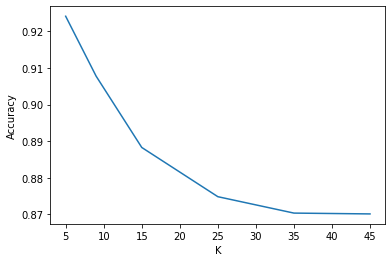

In [25]:
# Applying k-Fold Cross Validation
#n-jobs=-1，是指cpu全開
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
n_neighbors  = [5, 9, 15, 25, 35, 45] ## 可自行嘗試不同K值
scores = []
for k in n_neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    # cv = 10 代表切成10等分
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,n_jobs=-1)
    scores.append(accuracies.mean())
    print('設置K值:{}'.format(k))
    print('Average Accuracy: {}'.format(accuracies.mean()))
    print('Accuracy STD: {}'.format(accuracies.std()))

plt.plot(n_neighbors,scores)
plt.xlabel('K')
plt.ylabel('Accuracy')		
plt.show()